# Assignment 1 DSE 317 by Rakshith Vaishnavi Dogra 21218

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Importing the Image
**Resized the image, greyscaled and displayed it**

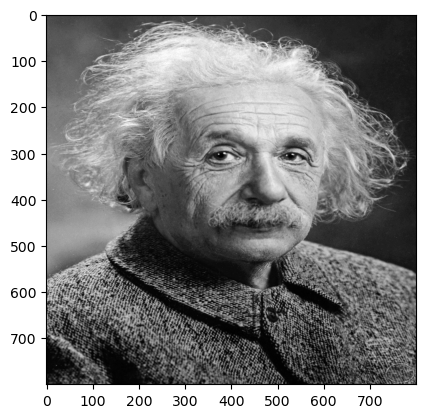

In [2]:
image = cv2.imread("Einstein.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = cv2.resize(gray_image,(800, 800))
plt.gray()
plt.imshow(gray_image)
plt.show()

# Calculating the Size of Output Convoluted Image
**The Output image will be of size: Original_Image[x]  - (Kernal[x] - 1) X  Original_Image[y] - (Kernal[y] - 1)**

In [3]:
def calculate_output_size(image, kernal):
    sh = kernal.shape[0]
    pad = sh - 1 
    out = image.shape[0] - pad
    return out


# Implementing the Convolution Operation

In [4]:
def convolve(image, kernal):
    k = kernal.shape[0]
    target_shape = calculate_output_size(image, kernal)
    con_img = np.zeros(shape = (target_shape, target_shape))
    for i in range(target_shape):
        for j in range(target_shape):
            mat = image[i: i + k, j : j + k]
            con_img[i][j] = compute_conv(mat, kernal)
    return con_img

def compute_conv(subset, kernal):
    con_s = 0
    for i in range(3):
        sum = 0
        for j in range(3):
            sum += subset[i][j] * kernal[i][j]
    con_s += sum
    return con_s


# Implementing the Filters

In [5]:
f1 = np.array([[0,0,0],
             [0, 1, 0],
             [0, 0, 0]])
f2 = np.array([[0, 0, 0],
              [0, 0, 1],
              [0, 0, 0]])
f3 = np.array([[0, 0, 0],
              [1, 0, 0],
              [0, 0, 0]])
f4 = np.array([[0, 0, 0],
              [0, 0, 0],
              [1, 0, 0]])
f5 = np.array([[0, 0, 1],
              [0, 0, 0],
              [0, 0, 0]])
q2_1 = np.array([[1, 0, -1],
                [2, 0 ,-2],
                [1, 0, -1]])
q2_2 = np.array([[1, 2, 1],
                 [0, 0, 0],
                 [-1, -2, -1]])


# Question 1

In [6]:
fim1 = convolve(gray_image, f1)
fim2 = convolve(gray_image, f2)
fim3 = convolve(gray_image, f3)
fim4 = convolve(gray_image, f4)
fim5 = convolve(gray_image, f5)

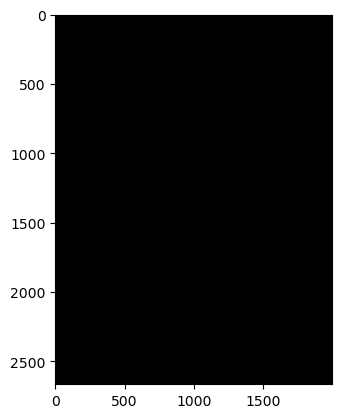

In [7]:
dst = cv2.filter2D(image, -1, fim1)
plt.imshow(dst)

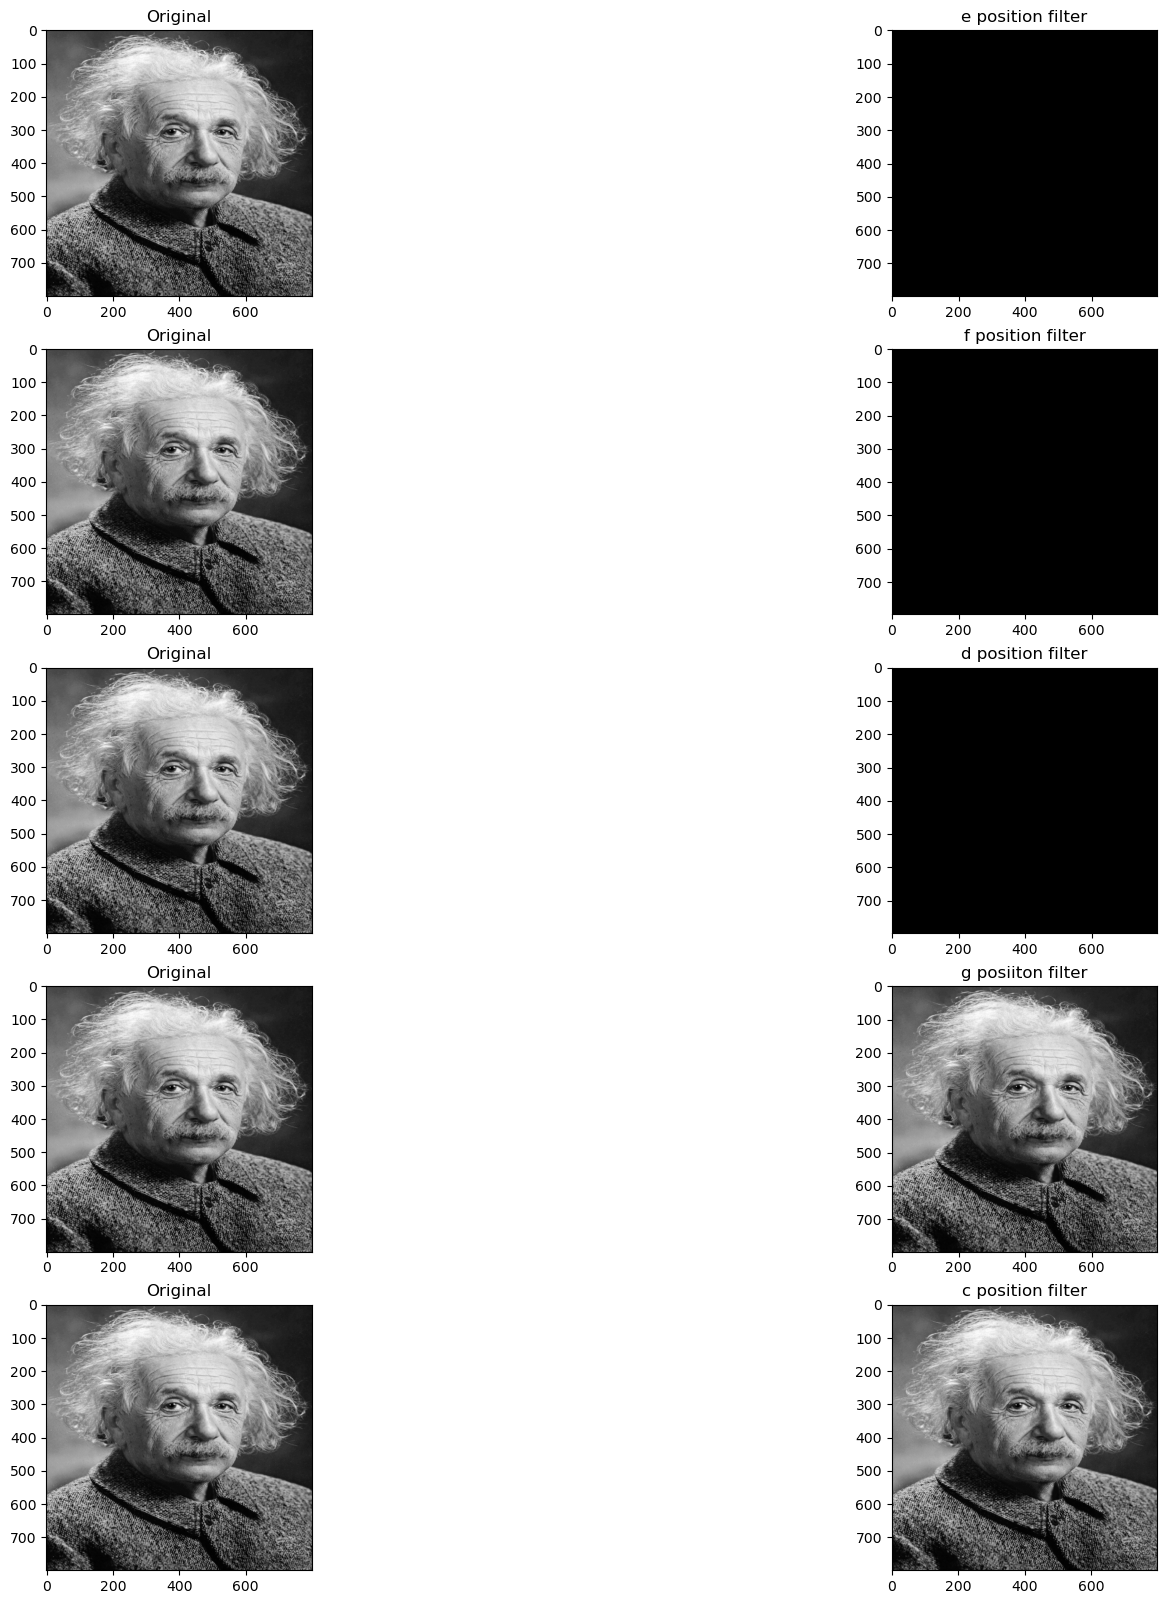

In [8]:
fig5 = plt.figure(figsize = (20, 20))
rows = 5
columns = 2

fig5.add_subplot(rows, columns, 1)
plt.imshow(gray_image)
plt.title("Original")

fig5.add_subplot(rows, columns, 2)
plt.imshow(fim1)
plt.title("e position filter")

fig5.add_subplot(rows, columns, 3)
plt.imshow(gray_image)
plt.title("Original")

fig5.add_subplot(rows, columns, 4)
plt.imshow(fim2)
plt.title("f position filter")

fig5.add_subplot(rows, columns, 5)
plt.imshow(gray_image)
plt.title("Original")

fig5.add_subplot(rows, columns, 6)
plt.imshow(fim3)
plt.title("d position filter")

fig5.add_subplot(rows, columns, 7)
plt.imshow(gray_image)
plt.title("Original")

fig5.add_subplot(rows, columns, 8)
plt.imshow(fim4)
plt.title("g posiiton filter")

fig5.add_subplot(rows, columns, 9)
plt.imshow(gray_image)
plt.title("Original")

fig5.add_subplot(rows, columns, 10)
plt.imshow(gray_image)
plt.title("c position filter")
plt.show()

# Question 2

In [9]:
img1 = convolve(gray_image, q2_1)
img2 = convolve(gray_image, q2_2)
# new = gray_image - img


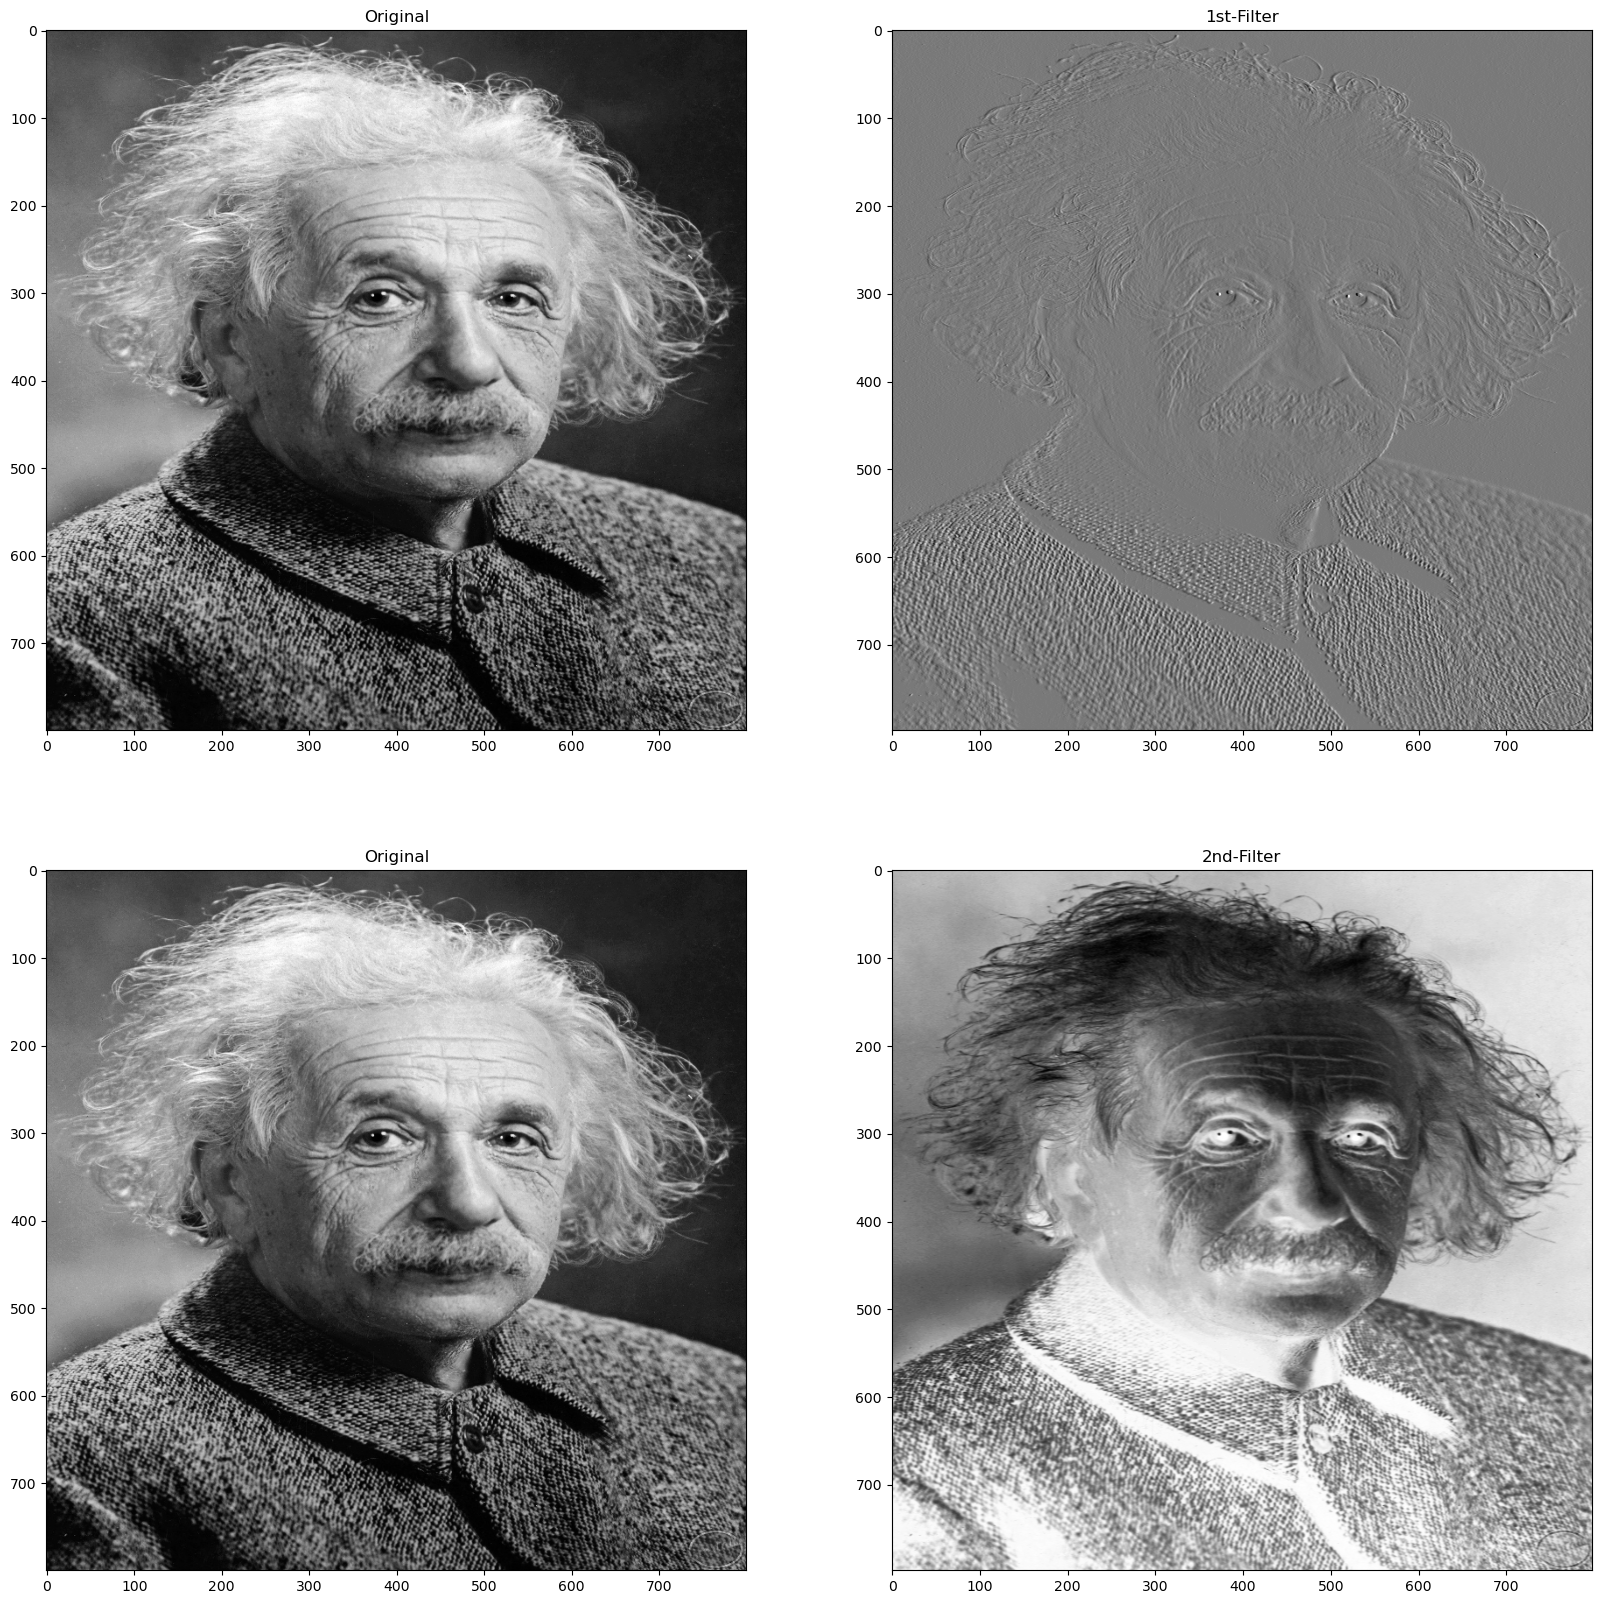

In [10]:
rows = 2
columns = 2
fig= plt.figure(figsize = (20, 20))
fig.add_subplot(rows, columns, 1)
plt.imshow(gray_image)
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(img1)
plt.title("1st-Filter")

fig.add_subplot(rows, columns, 3)
plt.imshow(gray_image)
plt.title("Original")

fig.add_subplot(rows, columns, 4)
plt.imshow(img2)
plt.title("2nd-Filter")

plt.show()

# Question 3
**Adding Average Filter**

In [11]:
#Declaring the average filter
fil_average = np.array([[1/9, 1/9, 1/9],
                       [1/9, 1/9, 1/9],
                       [1/9, 1/9, 1/9]])

In [12]:

im_av = convolve(gray_image, fil_average)

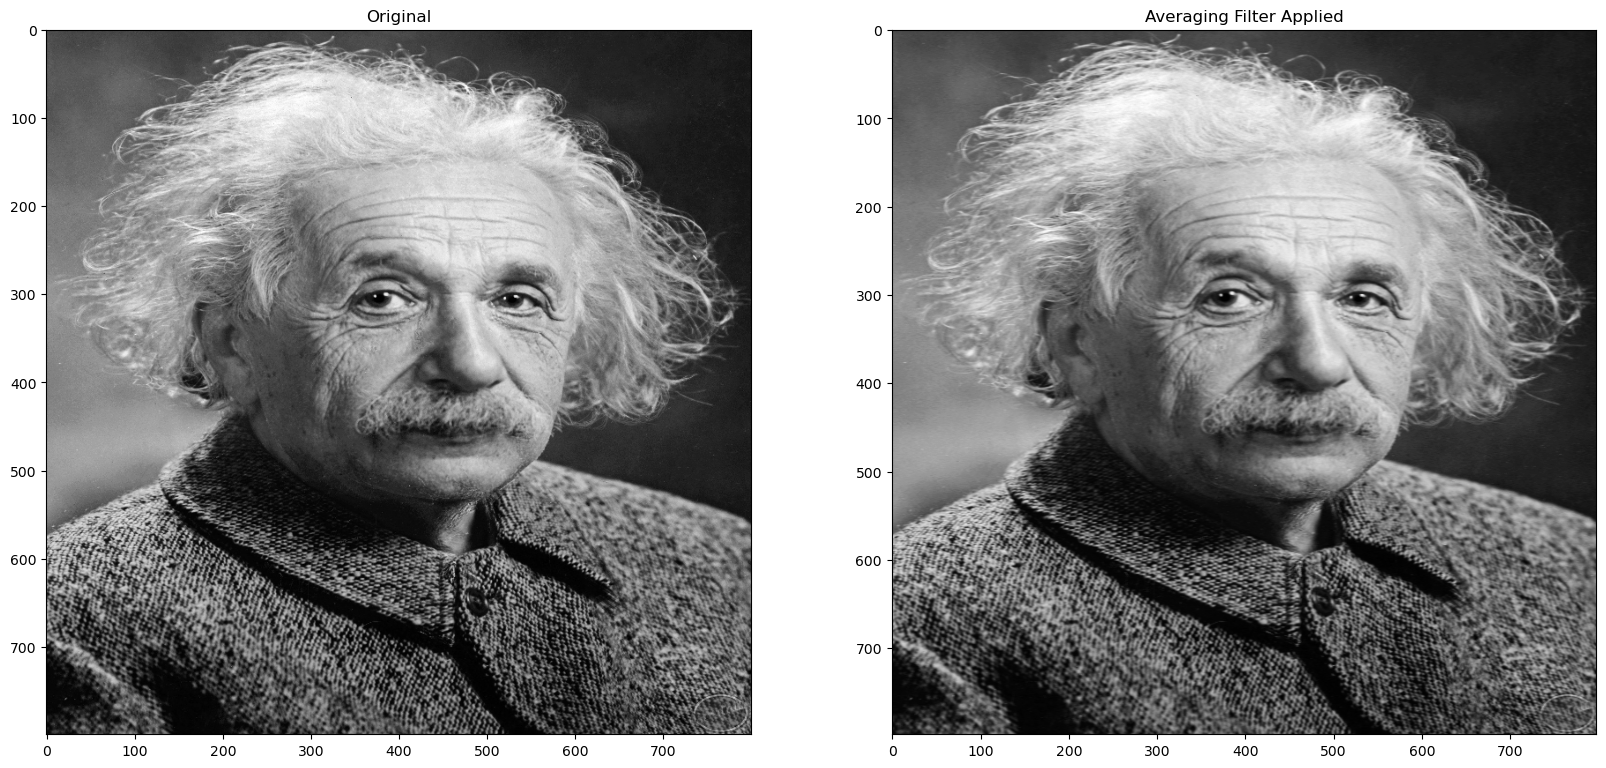

In [13]:
fig1= plt.figure(figsize = (20, 20))
rows = 1
columns = 2
fig1.add_subplot(rows, columns, 1)
plt.imshow(gray_image)
plt.title("Original")

fig1.add_subplot(rows, columns, 2)
plt.imshow(im_av)
plt.title("Averaging Filter Applied")
plt.show()

**Adding Gaussian Filter**
> https://www.researchgate.net/figure/Discrete-approximation-of-the-Gaussian-kernels-3x3-5x5-7x7_fig2_325768087

In [14]:
fil_gaussian = np.array([[1/16, 1/8, 1/16],
                        [1/8, 1/4, 1/8],
                        [1/16, 1/8, 1/16]])

In [15]:
im_gau = convolve(gray_image, fil_gaussian)

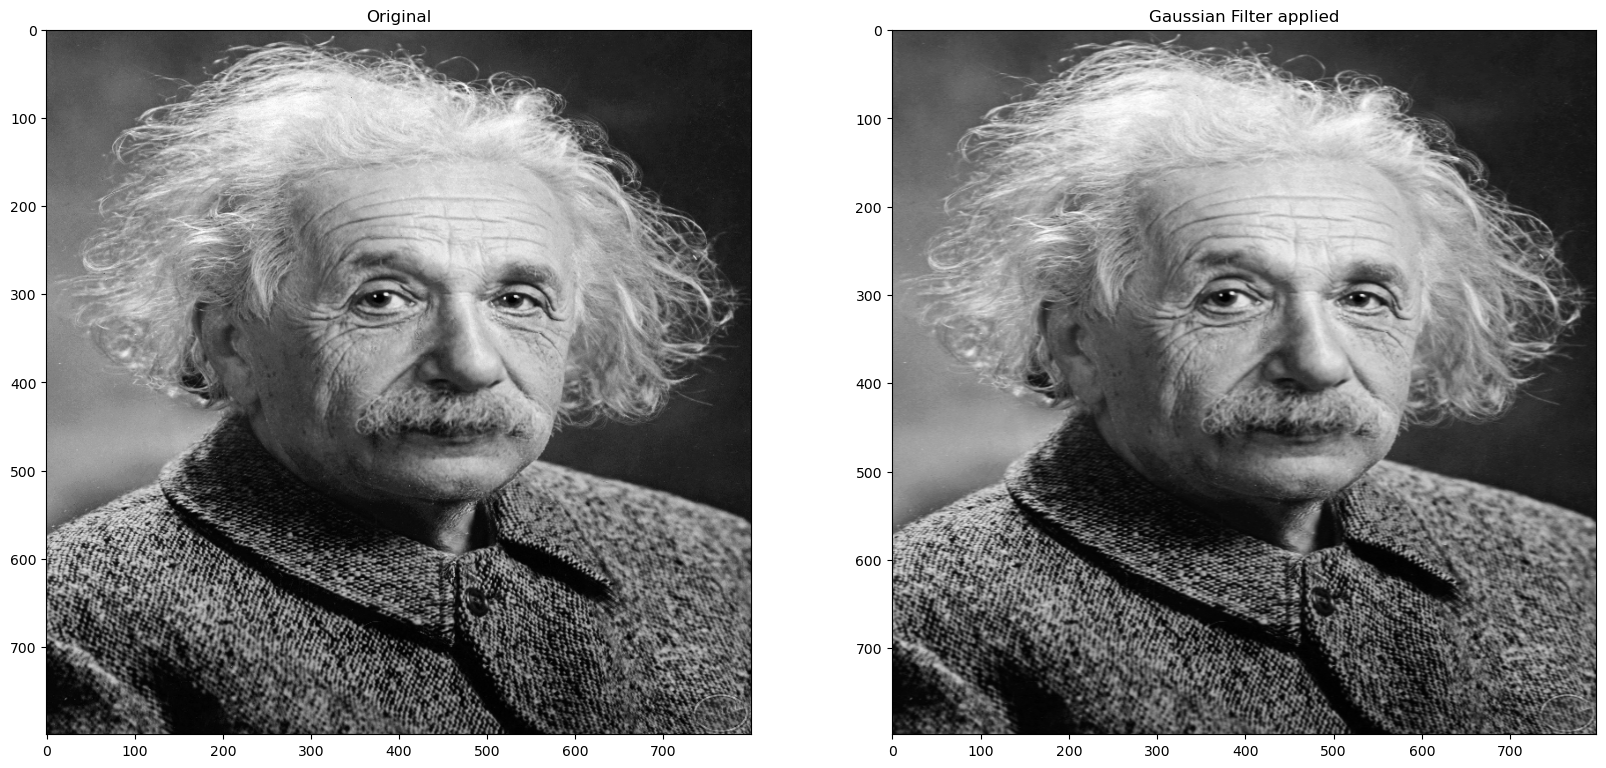

In [16]:
fig3= plt.figure(figsize = (20, 20))
rows = 1
columns = 2
fig3.add_subplot(rows, columns, 1)
plt.imshow(gray_image)
plt.title("Original")

fig3.add_subplot(rows, columns, 2)
plt.imshow(im_gau)
plt.title("Gaussian Filter applied")
plt.show()